### **Q1. What is Random Forest Regressor?**
Ans: \
####  Definition:
The **Random Forest Regressor** is an **ensemble learning method** used for **regression tasks**. It builds **multiple decision trees** and combines their outputs to make more accurate and stable predictions.

> In simple terms:  
> It’s like asking a group of experts (trees) to predict a value and then taking their **average** — this gives a more reliable answer.



####  How It Works:

1. **Bootstrap Sampling**:  
   Each tree is trained on a random sample **with replacement** from the original dataset (called a bootstrap sample).

2. **Random Feature Selection**:  
   At each split in the tree, only a **random subset of features** is considered for splitting. This adds **diversity** among trees.

3. **Building Trees**:  
   Each decision tree is built **independently and fully**, without pruning.

4. **Prediction**:  
   For a given input, each tree predicts a value. The final prediction is the **average** of all tree outputs.


####  Example Use:
If you’re predicting the **price of a house** based on features like location, size, number of rooms, etc., a Random Forest Regressor will:
- Build many trees from random slices of the data.
- Combine their predictions to give a **more robust** price estimate.

---

### **Q2. How does Random Forest Regressor reduce the risk of overfitting?**
Ans: \
Overfitting means a model learns the **noise** in the training data instead of the actual pattern, leading to poor generalization.

Random Forest handles this problem very effectively. Here's how:

---

####  Techniques That Help Reduce Overfitting:

1. **Averaging Reduces Variance**:
   - A single decision tree might overfit.
   - Random Forest builds many trees and **averages their results**, which **smooths out extreme predictions** and reduces overfitting.

2. **Bootstrapping (Bagging)**:
   - Each tree sees a **different subset** of the data.
   - This ensures that trees are **less correlated**, which means their errors are less likely to line up.

3. **Feature Randomness**:
   - Each split considers **only a subset of features**.
   - This increases **diversity among trees**, making the forest stronger overall and less prone to overfitting.

4. **No Tree Pruning Needed**:
   - Even though each tree might be **deep and overfit**, the forest as a whole is **robust** due to averaging.

---

#### Summary of Overfitting Control:

| Technique | How it helps |
|-----------|--------------|
| **Bagging** | Reduces variance by using multiple samples |
| **Random feature selection** | Reduces correlation between trees |
| **Averaging predictions** | Smooths out noise and stabilizes output |

              Original Dataset
                     |
            ---------------------
           |         |          |
    Bootstrap 1  Bootstrap 2  Bootstrap 3  ... (Sampling with replacement)
           |         |          |
     Decision Tree 1  Decision Tree 2  Decision Tree 3
           |         |          |
       Prediction1 Prediction2 Prediction3
           \         |         /
            \        |        /
             \       |       /
              \      |      /
               \     |     /
                Averaged Prediction
                (Final Output)


In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.26


### **Q3. How does Random Forest Regressor aggregate the predictions of multiple decision trees?**
Ans: \
####  Core Idea:
Random Forest Regressor combines the output of **multiple decision trees** to make a **final prediction**.

####  How Aggregation Works in Regression:
- Each decision tree gives a **numerical prediction** for the same input.
- The **final output** is the **average (mean)** of all those predictions.

>  Formula:
$$[
\text{Final Prediction} = \frac{1}{N} \sum_{i=1}^{N} \text{Prediction}_i
]$$
Where:
- \( N \) = number of trees in the forest
- $( \text{Prediction}_i )$ = output of the $(i^\text{th})$ tree

####  Example:

Say you input a data point into 5 decision trees, and they predict:

- Tree 1: 220  
- Tree 2: 240  
- Tree 3: 230  
- Tree 4: 250  
- Tree 5: 210  

**Final Prediction** = (220 + 240 + 230 + 250 + 210) / 5 = **230**

>  This averaging makes the prediction more **stable**, **less noisy**, and **less prone to overfitting** compared to any single tree.

---

### **Q4. What are the hyperparameters of Random Forest Regressor?**

Hyperparameters are the settings you configure **before training** a model. In Random Forest, they control the behavior of the ensemble and each tree.

Here are the most commonly used ones:

---

####  **Tree-related Hyperparameters**:

| Hyperparameter | Description |
|----------------|-------------|
| `n_estimators` | Number of trees in the forest. More trees → better performance but slower. |
| `max_depth` | Maximum depth of each tree. Controls how deep each tree can go. |
| `min_samples_split` | Minimum number of samples required to split an internal node. Higher value → simpler trees. |
| `min_samples_leaf` | Minimum number of samples required to be at a leaf node. Prevents trees from being too deep. |
| `max_features` | Number of features to consider at each split (`auto`, `sqrt`, `log2`, or a number). Controls tree diversity. |
| `bootstrap` | Whether to use bootstrap samples when building trees (usually `True` for bagging). |

---

####  **Model control and randomness**:

| Hyperparameter | Description |
|----------------|-------------|
| `random_state` | Controls randomness of sampling. Useful for reproducibility. |
| `n_jobs` | Number of parallel jobs to run. `-1` means use all cores (faster training). |
| `oob_score` | If `True`, uses out-of-bag samples to estimate generalization error. |
| `criterion` | Function to measure the quality of a split (`squared_error`, `absolute_error`, etc.). |


####  Example:

```python
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    oob_score=True,
    n_jobs=-1
)
```


###  Summary

| Key Point |
|-----------|
| Random Forest Regressor aggregates predictions by **averaging** the outputs of multiple trees, making results smoother and more generalizable. |
| Important hyperparameters include `n_estimators`, `max_depth`, `min_samples_split`, `max_features`, and others that control tree complexity, randomness, and efficiency. |

### **Q5. What is the difference between Random Forest Regressor and Decision Tree Regressor?**
Ans:

| Feature | **Decision Tree Regressor** | **Random Forest Regressor** |
|---------|------------------------------|-------------------------------|
|  **Model Type** | Single decision tree | Ensemble of many decision trees |
|  **Overfitting Risk** | High (especially if tree is deep) | Low (due to averaging over multiple trees) |
|  **Prediction Output** | Direct output from one tree | Average of outputs from all trees |
|  **Bias** | Low bias | Slightly higher bias than single tree |
|  **Variance** | High variance | Low variance (averaging reduces it) |
|  **Robustness to Noise** | Poor — easily affected | Strong — handles noisy data well |
|  **Interpretability** | Easy to interpret | Harder to interpret as it combines many trees |
|  **Training Time** | Fast | Slower (training many trees) |
|  **Tuning Complexity** | Simple | More hyperparameters to tune |

####  In Simple Terms:
- **Decision Tree** is like one judge giving a score.
- **Random Forest** is like taking the average score from a panel of judges — more stable, more accurate.

---

### **Q6. What are the advantages and disadvantages of Random Forest Regressor?**
Ans: \

####  **Advantages of Random Forest Regressor**

1. **Reduces Overfitting**  
   - By averaging predictions, it minimizes the risk of overfitting compared to a single decision tree.

2. **High Accuracy**  
   - Performs very well in most regression tasks out-of-the-box.

3. **Robust to Noise and Outliers**  
   - Not easily thrown off by noisy data or small changes in input.

4. **Handles Non-linearity**  
   - Captures complex patterns and interactions in data without needing explicit feature engineering.

5. **Feature Importance**  
   - Can rank features by their contribution to prediction, useful for feature selection.

6. **Versatile**  
   - Works well for both small and large datasets, and can handle both numerical and categorical data.

7. **OOB Error Estimation**  
   - Can estimate performance using Out-of-Bag samples without needing a validation set.

---

####  **Disadvantages of Random Forest Regressor**

1. **Less Interpretable**  
   - Unlike a single tree, you can't visualize the whole forest easily.

2. **Slower Predictions**  
   - Especially with a large number of trees or a large dataset.

3. **More Computationally Expensive**  
   - Training many trees takes more memory and time.

4. **Not Ideal for Real-Time Applications**  
   - Due to slower prediction speed compared to simple models.

5. **Bias from Bagging**  
   - Averaging can slightly increase bias compared to a deep decision tree.

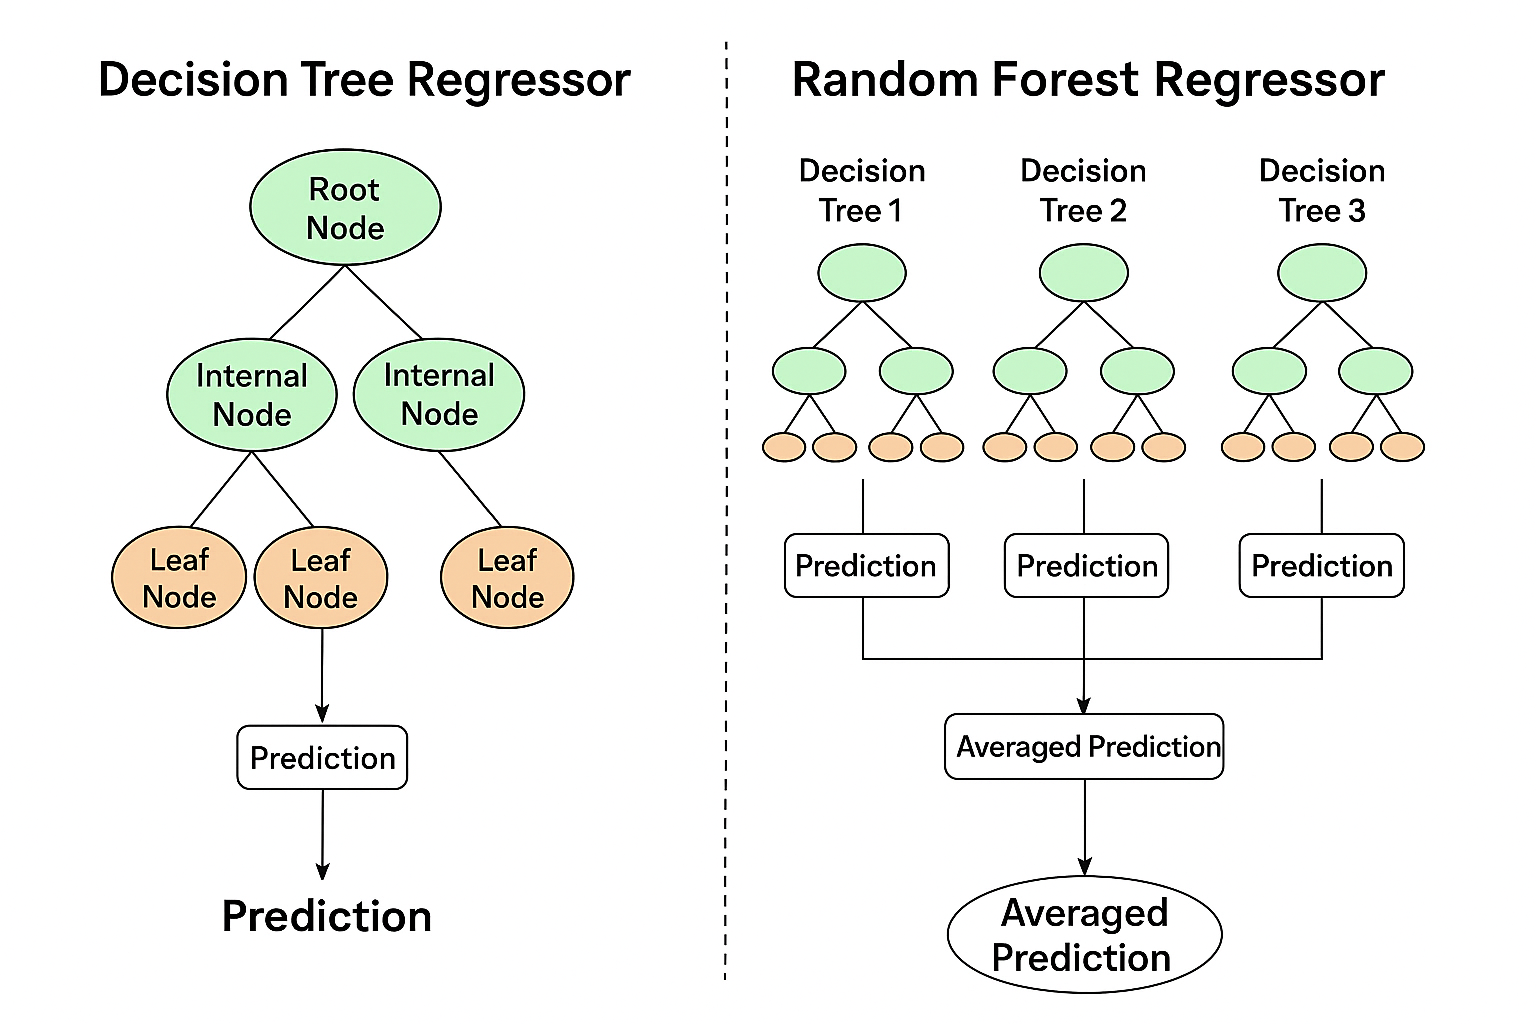

### **Q7. What is the output of Random Forest Regressor?**
Ans: \
####  Output Type:
The **output** of a Random Forest Regressor is a **numerical (continuous)** value — the **average of predictions** from all decision trees in the ensemble.

####  How It Works:
- Suppose you input a data point into the model.
- Each tree in the forest gives a **real-number prediction**.
- The final output is the **mean** of these predictions.

####  Example:

| Tree | Prediction |
|------|------------|
| Tree 1 | 45.2 |
| Tree 2 | 48.7 |
| Tree 3 | 47.0 |
| Tree 4 | 46.5 |

**Final Output** = (45.2 + 48.7 + 47.0 + 46.5) / 4 = **46.85**

>  This averaging smooths out extreme predictions and gives a more **stable, reliable, and accurate** estimate.

### **Q8. Can Random Forest Regressor be used for classification tasks?**
Ans: \
####  Short Answer: **No**, not directly.

- **Random Forest Regressor** is specifically designed for **regression tasks**, where the goal is to predict a **numerical value**.
- For **classification**, you should use **Random Forest Classifier** instead.


####  But Here’s the Connection:

| Model | Task | Output Type | Aggregation Method |
|-------|------|-------------|---------------------|
| **Random Forest Regressor** | Regression | Continuous value | Average of predictions |
| **Random Forest Classifier** | Classification | Class label | Majority vote (mode) |

So while both use the same **ensemble of decision trees** approach:
- **Regressor → averages** predictions.
- **Classifier → votes** for the most common class.

>  Internally, both models work similarly (bootstrapping, feature randomness), but the final prediction method differs.
